<h2>FIN5622 Project #2
    <p class="text-primary">Loan Default Prediction with Random Forests</p>
</h2>

<div class = "alert alert-block alert-danger">
    <b>Due Date</b>: April 2nd, 2021, 11:59PM EST
</div>  

<div class = "panel panel-success">
    <div class = "panel-heading"> 
    <span style="color:black"><b>Project Introduction</b>
    </div>
    <div class = "panel-body"> 
    In this project we will build a random forest model to predict borrower defaults on a set of loan performance data.
    </div>
</div>

<div class = "panel panel-info">
    <div class = "panel-heading"> 
    <span style="color:black"><b>Instructions</b>
    </div>
    <div class = "panel-body"> 
    Please code you solutions directly in this Notebook under each task in the cells provided below. Tasks are intended to be done in order with results from one task informing work in later tasks. Include all code used to produce your results, and support your answers with textual explanations if neccessary. You may feel free to add additional Code and/or Markdown cells as needed. Code must be written using <b>Python 3</b>.
    <br><br>Please order the cells in your Notebook in the order in which they are intended to run! It is expected that your Notebook is able to run in sequence from start to finish without any errors (before submitting check by: <code>Kernel > Restart & Run All</code>).
    <br><br>Once ready, please submit your assignment as an <b>.ipynb file</b> (<code>File > Download as > Notebook</code>). You must name your files in the following format: <b><code>FIN5622_Project_1_Richard_Lee_tuc12345.ipynb</code></b>.
    </div>
</div>

---
<div class = "alert alert-block alert-warning">
    <b>Note</b>: Import all libraries that you plan on using in the code block below.
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score


<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 1</b>
    </div>
    <div class = "panel-body"> 
    Read in the dataset "loan_performance_data_2016.csv" into a dataframe called <code>loans</code> using the pandas <code>read_csv</code> function. Check that there are 405,180 loans present in the dataframe.
    <br><br>
    Note that there are 16 feature columns and 1 target column (i.e. "loan_default") in this dataset. Please review the file "Loan_Data_Dictionary.xlsx" for definitions on each column. Pick a variable that you believe will be the most important explanatory variable of loan defaults and explain why.
    <p style="text-align:right;">[0pts]</p>
    </div>
</div>

In [2]:
path = '../Data'

In [3]:
loans = pd.read_csv(f'{path}/loan_performance_data_2016.csv')
loans

,loan_amnt,loan_term,int_rate,fico,dti,annual_income,income_verification,home_mortgage,home_own,home_rent,debt_consolidation,coborrower,num_accounts,revol_bal,revol_util,derogatory_records,loan_default
0,7.200,3.0,5.32,750,19.05,49.0,0,1,0,0,1,0,11,9.309,18.4,0,0
1,12.000,5.0,11.99,670,6.59,49.0,0,1,0,0,0,0,10,12.152,50.6,0,1
2,11.425,3.0,19.53,730,35.56,26.0,0,0,0,1,0,0,11,2.096,7.2,0,0
3,17.500,3.0,13.67,665,38.29,46.0,0,0,0,1,1,0,33,18.847,62.6,0,0
4,22.875,5.0,17.27,670,11.75,65.0,0,0,0,1,1,0,6,25.200,90.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405175,16.000,5.0,12.79,665,12.25,150.0,0,0,0,1,0,0,12,7.700,55.0,1,0
405176,24.000,5.0,12.79,665,19.61,95.0,0,1,0,0,0,0,5,49.431,84.4,0,0
405177,40.000,5.0,10.49,705,12.75,227.0,1,1,0,0,0,0,5,8.633,64.9,0,0
405178,24.000,5.0,14.49,660,18.30,110.0,0,0,0,1,1,0,10,17.641,68.1,1,1


In [4]:
loans.columns

Index(['loan_amnt', 'loan_term', 'int_rate', 'fico', 'dti', 'annual_income',
       'income_verification', 'home_mortgage', 'home_own', 'home_rent',
       'debt_consolidation', 'coborrower', 'num_accounts', 'revol_bal',
       'revol_util', 'derogatory_records', 'loan_default'],
      dtype='object')

In [5]:
len(loans)

405180

In [6]:
loans.shape

(405180, 17)

I think that an explanatory variable of whether or not a loan deafults is going to be the term of the loan. When a loan is longer term, there are more variables that can cause someone to default such as a crash of the market or the loan holder losing their job.

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 2</b>
    </div>
    <div class = "panel-body"> 
    Use the function <code>train_test_split()</code> from the <code>sklearn.model_selection</code> module to split <code>loans</code> into training and test datasets. Provide the function with 2 separate numpy arrays, storing the features and target separately (like we did in class). Additionally, set the following optional paramters for the function to the values listed below:
    <ul>
        <li><code>test_size = .2</code></li>
        <li><code>random_state = 5622</code></li>
    </ul>
    <br>
    The function should return 4 outputs, representing the features and target for the training and test datasets, and store them as numpy arrays in variables called <code>X_train</code>, <code>X_test</code>, <code>y_train</code>, and <code>y_test</code>. The training data should contain 80%, while the test data should contain 20%, of the original <code>loans</code> dataset. 
    <br><br>
    Check that each array shoud have the following shapes: 
    <ul>
        <li><code>X_train.shape = (324144, 16)</code></li>
        <li><code>X_test.shape = (81036, 16)</code></li>
        <li><code>y_train.shape = (324144,)</code></li>
        <li><code>y_test.shape = (81036,)</code></li>
    </ul>
    <p style="text-align:right;">[15pts]</p>
    </div>
</div>

In [7]:
#copying data set into two segments (loan features and target loan data(whether or not the loan defaults)

loan_features = loans.drop(['loan_default'], axis = 1).copy()

In [8]:
loan_target = loans.loc[:, 'loan_default'].copy()

loans.shape, loan_features.shape, loan_target.shape

((405180, 17), (405180, 16), (405180,))

In [9]:
output = train_test_split(loan_features, loan_target, test_size = .2, random_state = 5622)


In [10]:
X_train = output[0]
X_train.shape

(324144, 16)

In [11]:
X_test = output[1]
X_test.shape

(81036, 16)

In [12]:
y_train = output[2]
y_train.shape

(324144,)

In [13]:
y_test = output[3]
y_test.shape

(81036,)

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 2</b>
    </div>
    <div class = "panel-body"> 
    Fit a random forest model using the training dataset, <code>X_train</code> and <code>y_train</code>. Recall that this is done by calling <code>RandomForestClassifier()</code> from the <code>sklearn.ensemble</code> module, and using the <code>fit()</code> method. Set <code>random_state = 5622</code> when initializing the random forest model. 
    <br><br>
    We will accept all default settings for this first random forest model. Specifically, the random forest will include 10 decision tree classifiers, no limit for tree depth, and no minimum leaf size. Store the fitted model in a variable called <code>rf_model_1</code>.
    </ul>
    <p style="text-align:right;">[15pts]</p>
    </div>
</div>

In [14]:
rf_model_1 = RandomForestClassifier(n_estimators = 10, random_state = 5622).fit(X_train, y_train)


<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 3</b>
    </div>
    <div class = "panel-body"> 
    Create a second random forest model, but changing the default settings to the below parameter values when calling <code>RandomForestClassifier()</code>: 
    <ul>
        <li><code>n_estimators = 50</code></li>
        <li><code>max_depth = 5</code></li>
        <li><code>min_samples_leaf = 5</code></li>
        <li><code>random_state = 5622</code></li>
    </ul>
    Fit the model using the <code>fit()</code> method on the training data, <code>X_train</code> and <code>y_train</code>, and save the model in a variable called <code>rf_model_2</code>.
    <br><br>
    Explain what each of the following parameters controls in the random forest model: 
    <ul>
        <li><code>n_estimators</code></li>
        <li><code>max_depth</code></li>
        <li><code>min_samples_leaf</code></li>
    </ul>
    <p style="text-align:right;">[20pts]</p>
    </div>
</div>

In [15]:
rf_model_2 = RandomForestClassifier(n_estimators = 50, max_depth = 5, min_samples_leaf = 5, random_state = 5622).fit(X_train, y_train)

n_estimators - How many descision treesn are in the random forest

max_depth - the number of steps in each tree

min_samples_leaf - How many samples you need at each step to add another step of depth

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 4</b>
    </div>
    <div class = "panel-body"> 
     Assess the performance of both <code>rf_model_1</code> and <code>rf_model_2</code> on the test dataset <code>X_test</code> and <code>y_test</code> by:
    <ul>
        <li>Calculating the classification error of the both model's predictions using the <code>score()</code> method.</li>
        <li>Comparing the mean predicted probability of default, using the <code>predict_proba()</code> method, against the actual observed rate of default for both models.</li>
        <li>Calculating the AUC for both models using the <code>roc_auc_score()</code> function from the <code>sklearn.metrics</code> module.</li>
    <p style="text-align:right;">[20pts]</p>
    </div>
</div>

In [16]:
rf_model_1.score(X_test, y_test), rf_model_2.score(X_test, y_test)

(0.7982625006170098, 0.805222370304556)

In [17]:
model_1_probas = rf_model_1.predict_proba(X_test)[:,1]
print(np.mean(model_1_probas))
print(np.mean(y_test))

0.2078890863320006
0.1950614541685177


In [18]:
model_2_probas = rf_model_2.predict_proba(X_test)[:,1]
print(np.mean(model_2_probas))
print(np.mean(y_test))

0.19648078233427232
0.1950614541685177


In [19]:
roc_auc_score(y_test, model_1_probas)

0.6499845811865892

In [20]:
roc_auc_score(y_test, model_2_probas)

0.7122833152969601

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 5</b>
    </div>
    <div class = "panel-body"> 
    Review the performance assessment results calculated in the previous tasks for both models. 
    <br><br>
    Which model, <code>rf_model_1</code> or <code>rf_model_2</code>, performed better under each of our performance metrics (classification error, actual vs. expected default probability, and AUC)? Explain which model was expected to perform better and why.
    <p style="text-align:right;">[15pts]</p>
    </div>
</div>

Based on the results shown we would use the random forest #2 model which formats the decision trees in our own set way. The score for model 2 is higher than that of model 1. I would have expected rf_model_1 to perform better based on the fact that by default it uses 100 n_estimators while rf_model_2 we only used 50

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 6</b>
    </div>
    <div class = "panel-body"> 
    Calculate the ROC curve for <code>rf_model_2</code>. Recall that this can be done using the function <code>roc_curve</code> from the <code>sklearn.metrics</code> module.
    <br><br>
    Plot the ROC curve on a line plot. Recall that the ROC curve should be a upward-sloping and concaved curve above the 45-degree line. Provide axis labels and a title for the plot.
    <p style="text-align:right;">[15pts]</p>
    </div>
</div>

In [21]:
model_2_fpr, model_2_tpr, model_2_thresholds = roc_curve(y_test, model_2_probas)
model_2_fpr, model_2_tpr

(array([0.00000000e+00, 1.53306045e-05, 3.06612090e-05, ...,
        9.99954008e-01, 9.99984669e-01, 1.00000000e+00]),
 array([0.00000000e+00, 6.32631113e-05, 6.32631113e-05, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]))

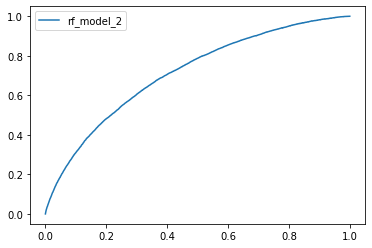

In [22]:
plt.plot(model_2_fpr, model_2_tpr)
plt.legend(['rf_model_2'])
plt.show()